# Plotting the whole data

AEO Tries

In [1]:
import pandas as pd
import glob

# Load all parquet files into a single DataFrame
files = glob.glob("data/year=2024/month=11/day=16/hour=23/*.parquet")
df = pd.concat([pd.read_parquet(file) for file in files])

In [2]:
print(df.head())
print(df.dtypes)

   df squawk bds60_bds  bds60_heading  bds60_IAS  bds60_Mach  \
0  21   3352        60      67.148438      245.0       0.744   
1  17   None      None            NaN        NaN         NaN   
2  17   None      None            NaN        NaN         NaN   
3  20   None      None            NaN        NaN         NaN   
4  20   None      None            NaN        NaN         NaN   

   bds60_vrate_barometric  bds60_vrate_inertial  icao24             ts  ...  \
0                    32.0                   0.0  4ca25a  1731798000264  ...   
1                     NaN                   NaN  407e63  1731798000264  ...   
2                     NaN                   NaN  3c5429  1731798000264  ...   
3                     NaN                   NaN  4ca25a  1731798000264  ...   
4                     NaN                   NaN  4ca9c1  1731798000264  ...   

  bds05_NICb  bds05_altitude  bds05_source  bds05_parity bds05_lat_cpr  \
0        NaN             NaN          None          None          

In [3]:
print(df.columns.tolist())

['df', 'squawk', 'bds60_bds', 'bds60_heading', 'bds60_IAS', 'bds60_Mach', 'bds60_vrate_barometric', 'bds60_vrate_inertial', 'icao24', 'ts', 'bds', 'NACv', 'groundspeed', 'track', 'vrate_src', 'vertical_rate', 'geo_minus_baro', 'tc', 'NUCp', 'parity', 'lat_cpr', 'lon_cpr', 'lat_deg', 'lon_deg', 'tisb', 'id', 'wake_vortex', 'callsign', 'altitude', 'bds40_bds', 'bds40_selected_mcp', 'bds40_selected_fms', 'bds40_barometric_setting', 'bds50_bds', 'bds50_roll', 'bds50_track', 'bds50_groundspeed', 'bds50_track_rate', 'bds50_TAS', 'version', 'NICa', 'NACp', 'SIL', 'TAH', 'HRD', 'SILs', 'source', 'selected_altitude', 'barometric_setting', 'selected_heading', 'autopilot', 'vnav_mode', 'alt_hold', 'approach_mode', 'tcas_operational', 'lnav_mode', 'GVA', 'BAI', 'subtype', 'emergency_state', 'bds45_bds', 'bds45_turbulence', 'bds45_wind_shear', 'bds45_microburst', 'bds45_icing', 'bds45_wake_vortex', 'bds45_static_temperature', 'bds45_static_pressure', 'bds45_radio_height', 'NICb', 'bds17_bds', 'bds1

In [4]:
len(df.columns.tolist())

125

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['lon_deg'], df['lat_deg'], alpha=0.5, s=10)
plt.title("Geospatial Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load and preprocess the data
df = pd.read_parquet("data/year=2024/month=11/day=16/hour=23/7fa82f924eb24a429fa321d057d2efd5.snappy.parquet")
df = df.dropna(subset=['lat_deg', 'lon_deg', 'altitude', 'ts'])

# Convert 'ts' from milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Sort by time
df = df.sort_values('timestamp')

# Optional: select a subset of time for animation
# start_time = pd.to_datetime('2024-11-17 16:00:00')
# df = df[df['timestamp'] >= start_time]

# Get all unique timestamps (you can resample for performance)
timestamps = df['timestamp'].sort_values().unique()

# Setup the figure and map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 5, 35, 44])  # [west, east, south, north]

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

# Plot the data
ax.scatter(df['lon_deg'], df['lat_deg'], s=10, c=df['altitude'], cmap='viridis', vmin=df['altitude'].min(), vmax=df['altitude'].max())


# Load airport data
airports = pd.read_csv("data/airports.csv")

# Filter to your region: lat 35–44, lon -10–5
airports_region = airports[
    (airports['latitude_deg'] >= 35) & (airports['latitude_deg'] <= 44) &
    (airports['longitude_deg'] >= -10) & (airports['longitude_deg'] <= 5)
]

# Plot airports as blue triangle markers
ax.scatter(
    airports_region['longitude_deg'],
    airports_region['latitude_deg'],
    color='blue',
    s=40,
    marker='^',
    transform=ccrs.PlateCarree(),
    label='Airports'
)

# Optionally add IATA codes as labels
for _, row in airports_region.iterrows():
    ax.text(
        row['longitude_deg'] + 0.05,
        row['latitude_deg'] + 0.05,
        row['iata_code'],
        fontsize=8,
        transform=ccrs.PlateCarree()
    )


plt.show()

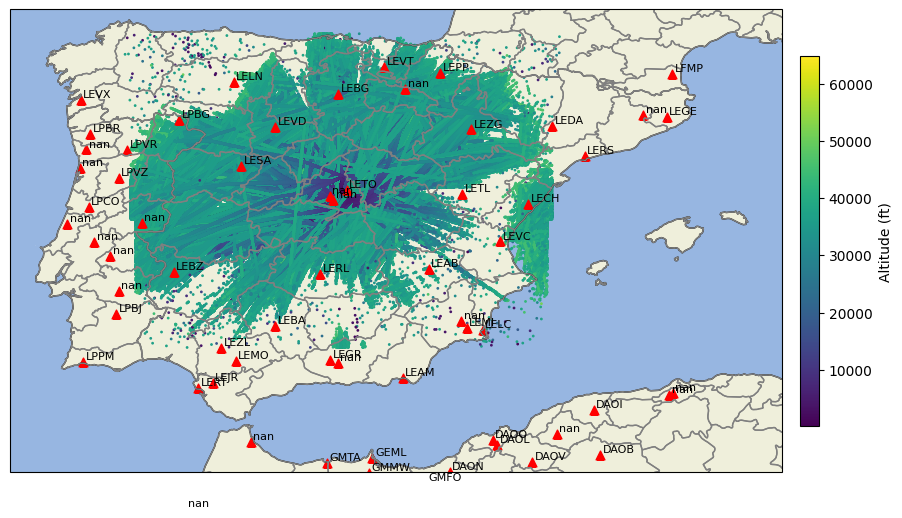

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob

# Load and preprocess the data
files = glob.glob("data/year=2024/month=11/day=*/hour=*/*.parquet")

# Subset of columns to keep
columns_to_keep = ['lat_deg', 'lon_deg', 'altitude', 'ts']

# Read and filter each Parquet, then store in a list
filtered_dfs = [
    pd.read_parquet(file)[columns_to_keep]
    for file in files
]

# Concatenate all filtered DataFrames
df = pd.concat(filtered_dfs, ignore_index=True)

df = df.dropna(subset=['lat_deg', 'lon_deg', 'altitude', 'ts'])

# Convert 'ts' from milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Sort by time
df = df.sort_values('timestamp')

# Optional: select a subset of time for animation
# start_time = pd.to_datetime('2024-11-17 16:00:00')
# df = df[df['timestamp'] >= start_time]

# Get all unique timestamps (you can resample for performance)
timestamps = df['timestamp'].sort_values().unique()

# Setup the figure and map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 5, 35, 44])  # [west, east, south, north]

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, edgecolor='gray')

# Plot the data
sc = ax.scatter(df['lon_deg'], df['lat_deg'], s=1, c=df['altitude'], cmap='viridis', vmin=df['altitude'].min(), vmax=df['altitude'].max())

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Altitude (ft)')

# Load airport data
airports = pd.read_csv("data/airports.csv", delimiter=',', )

# Filter to your region: lat 35–44, lon -10–5
airports_region = airports[
    (airports['latitude_deg'] >= 35-1) & (airports['latitude_deg'] <= 44-1) &
    (airports['longitude_deg'] >= -10+1) & (airports['longitude_deg'] <= 5-1) &
    (airports['type'] == "medium_airport")
]

# Plot airports as red triangle markers
ax.scatter(
    airports_region['longitude_deg'],
    airports_region['latitude_deg'],
    color='red',
    s=40,
    marker='^',
    transform=ccrs.PlateCarree(),
    label='Airports'
)

# Optionally add IATA codes as labels
for _, row in airports_region.iterrows():
    ax.text(
        row['longitude_deg'] + 0.05,
        row['latitude_deg'] + 0.05,
        row['icao_code'],
        fontsize=8,
        transform=ccrs.PlateCarree()
    )


plt.show()

In [20]:
airports_region

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
21188,2047,DAAB,medium_airport,Blida Airport,36.503601,2.814170,535.0,AF,DZ,DZ-09,Blida,no,NaN,QLD,DAAB,NaN,NaN,https://en.wikipedia.org/wiki/Blida_Airport,NaN
21194,2052,DAAK,medium_airport,Boufarik Air Base,36.545799,2.876110,335.0,AF,DZ,DZ-09,Boufarik,no,NaN,NaN,DAAK,NaN,NaN,https://en.wikipedia.org/wiki/Boufarik_Airport,QFD
21205,2059,DAAZ,medium_airport,Relizane Airport,35.752955,0.625877,282.0,AF,DZ,DZ-48,Relizane,no,NaN,NaN,DAAZ,NaN,NaN,https://en.wikipedia.org/wiki/Relizane_Airport,QZN
21217,2065,DAOB,medium_airport,Abdelhafid Boussouf Bou Chekif Airport,35.341099,1.463150,3245.0,AF,DZ,DZ-14,Tiaret,no,DAOB,TID,DAOB,NaN,NaN,https://en.wikipedia.org/wiki/Bou_Chekif_Airport,NaN
21221,2068,DAOI,medium_airport,Chlef Aboubakr Belkaid International Airport,36.217166,1.342237,463.0,AF,DZ,DZ-02,Chlef,yes,DAOI,CFK,DAOI,NaN,NaN,https://en.wikipedia.org/wiki/Chlef_Internatio...,Ech Cheliff Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43448,317032,LPSO,medium_airport,Aeródromo Municipal de Ponte de Sor,39.211559,-8.056542,390.0,EU,PT,PT-12,Ponte de Sor,no,NaN,NaN,LPSO,NaN,https://aerodromo.cm-pontedesor.pt,NaN,NaN
43453,4464,LPTN,medium_airport,Tancos Airbase,39.475101,-8.364580,266.0,EU,PT,PT-14,Tancos,no,NaN,NaN,LPTN,NaN,NaN,https://pt.wikipedia.org/wiki/Aer%C3%B3dromo_M...,NaN
43455,29493,LPVL,medium_airport,Vilar de Luz Airfield,41.277290,-8.516209,762.0,EU,PT,PT-13,Maia,no,NaN,NaN,LPVL,NaN,NaN,https://en.wikipedia.org/wiki/Maia_Airport,NaN
43456,4465,LPVR,medium_airport,Vila Real Airport,41.274300,-7.720470,1805.0,EU,PT,PT-17,Vila Real,yes,LPVR,VRL,LPVR,NaN,NaN,https://en.wikipedia.org/wiki/Vila_Real_Airport,NaN
